<a href="https://colab.research.google.com/github/NishdharaniP/Garbage_Classification_Colab/blob/main/Garbage_Classifcation_EfficientNetV2B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np


In [ ]:
import pandas as pd

In [ ]:
import os


In [ ]:
import cv2

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
import seaborn as sns


In [ ]:
import tensorflow as tf


In [ ]:
import keras


In [ ]:
from tqdm import tqdm


In [ ]:
from keras.callbacks import EarlyStopping,ModelCheckpoint


In [ ]:

from sklearn.metrics import confusion_matrix , accuracy_score



In [ ]:
from sklearn.metrics import classification_report


In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
from sklearn.preprocessing import LabelEncoder


In [ ]:
import glob


In [ ]:
import pandas as pan


In [ ]:
import matplotlib.pyplot as plotter


In [ ]:
import warnings


In [ ]:
import seaborn as sns


In [ ]:
warnings.filterwarnings('ignore')

In [ ]:
image_data= '/content/drive/MyDrive/dl_dataset_garbage/garbage_classification'
pd.DataFrame(os.listdir(image_data),columns=['Files_Name'])


In [ ]:
files = [i for i in glob.glob(image_data + "//*//*")]
np.random.shuffle(files)
labels = [os.path.dirname(i).split("/")[-1] for i in files]
data = zip(files, labels)
dataframe = pan.DataFrame(data, columns = ["Image", "Label"])
dataframe

,Image,Label
0,/content/drive/MyDrive/dl_dataset_garbage/garb...,clothes
1,/content/drive/MyDrive/dl_dataset_garbage/garb...,white-glass
2,/content/drive/MyDrive/dl_dataset_garbage/garb...,trash
3,/content/drive/MyDrive/dl_dataset_garbage/garb...,shoes
4,/content/drive/MyDrive/dl_dataset_garbage/garb...,clothes
...,...,...
15543,/content/drive/MyDrive/dl_dataset_garbage/garb...,biological
15544,/content/drive/MyDrive/dl_dataset_garbage/garb...,clothes
15545,/content/drive/MyDrive/dl_dataset_garbage/garb...,green-glass
15546,/content/drive/MyDrive/dl_dataset_garbage/garb...,biological


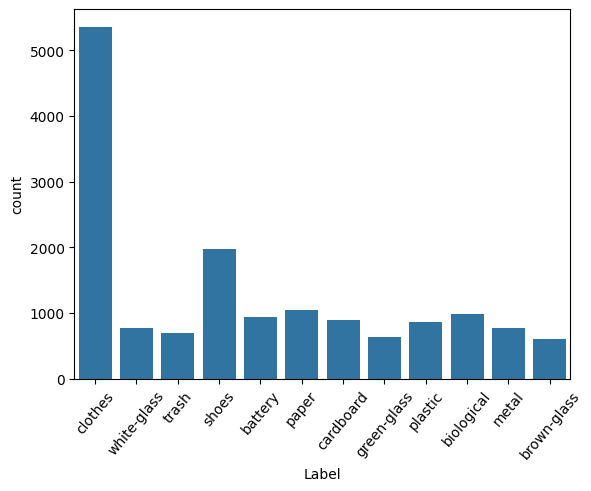

In [ ]:
sns.countplot(x = dataframe["Label"])
plotter.xticks(rotation = 50);

In [ ]:
train_data_dir =image_data
batch_size = 128                           # de 32 para 128
target_size = (224,224)
validation_split = 0.2

In [ ]:
train= tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    validation_split=validation_split,
    subset="training",
    seed=50,                                                         # de 100 para 50
    image_size=target_size,
    batch_size=batch_size,
)
validation= tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    validation_split=validation_split,
    subset="validation",
    seed=100,                                                         # de 200 para 100
    image_size=target_size,
    batch_size=batch_size,
)


Found 15548 files belonging to 12 classes.
Using 12439 files for training.
Found 15548 files belonging to 12 classes.
Using 3109 files for validation.


In [ ]:
class_names = train.class_names
class_names

['battery',
 'biological',
 'brown-glass',
 'cardboard',
 'clothes',
 'green-glass',
 'metal',
 'paper',
 'plastic',
 'shoes',
 'trash',
 'white-glass']

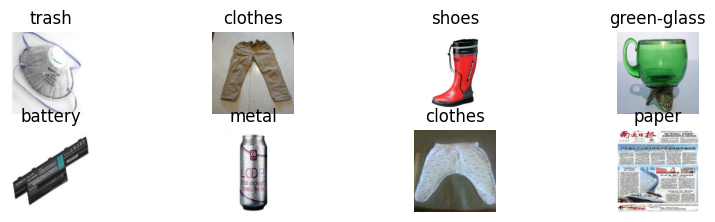

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train.take(1):
    for i in range(8):
        ax = plt.subplot(8, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [ ]:
base_model = tf.keras.applications.EfficientNetV2B1(input_shape=(224,224,3),include_top=False,weights='imagenet')
base_model.trainable = False
keras_model=keras.models.Sequential()
keras_model.add(base_model)
keras_model.add(keras.layers.Flatten())
keras_model.add(keras.layers.Dropout(0.5))
keras_model.add(keras.layers.Dense(12,activation=tf.nn.softmax))     #12 classes
keras_model.summary()

28456008/28456008 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetv2-b1 (Functio  (None, 7, 7, 1280)        6931124   
 nal)                                                            
                                                                 
 flatten (Flatten)           (None, 62720)             0         
                                                                 
 dropout (Dropout)           (None, 62720)             0         
                                                                 
 dense (Dense)               (None, 12)                752652    
                                                                 
Total params: 7683776 (29.31 MB)
Trainable params: 752652 (2.87 MB)
Non-trainable params: 6931124 (26.44 MB)
_________________________________________________________________


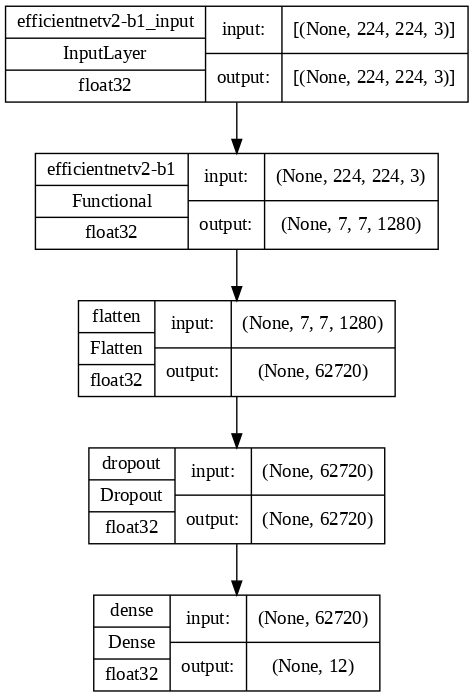

In [ ]:
tf.keras.utils.plot_model(keras_model, to_file='model.png', show_shapes=True, show_layer_names=True,show_dtype=True,dpi=100)

In [ ]:
checkpoint =ModelCheckpoint("my_keras_model.h5", save_best_only=True)

In [ ]:
early_stopping =EarlyStopping(patience=10, restore_best_weights=True)

In [ ]:
keras_model.compile(optimizer ='Adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
hist=keras_model.fit_generator(train,epochs=10,validation_data=validation,callbacks=[checkpoint,early_stopping])


In [ ]:
score, acc = keras_model.evaluate(validation)
print('Test Loss =', score)
print('Test Accuracy =', acc)

25/25 [==============================] - 260s 10s/step - loss: 0.0788 - accuracy: 0.9929
Test Loss = 0.07880526781082153
Test Accuracy = 0.9929237961769104


In [ ]:
hist_=pd.DataFrame(hist.history)
hist_

,loss,accuracy,val_loss,val_accuracy
0,0.562651,0.895329,0.078106,0.982953
1,0.138247,0.971943,0.063526,0.989064
2,0.092957,0.981831,0.062165,0.989386
3,0.079354,0.984243,0.074012,0.989386
4,0.080300,0.983922,0.093178,0.985848
5,0.066535,0.986976,0.069824,0.990672
6,0.075166,0.987780,0.055374,0.992602
7,0.046486,0.991478,0.069578,0.990994
8,0.059271,0.990031,0.082502,0.991959
9,0.058874,0.991237,0.078805,0.992924


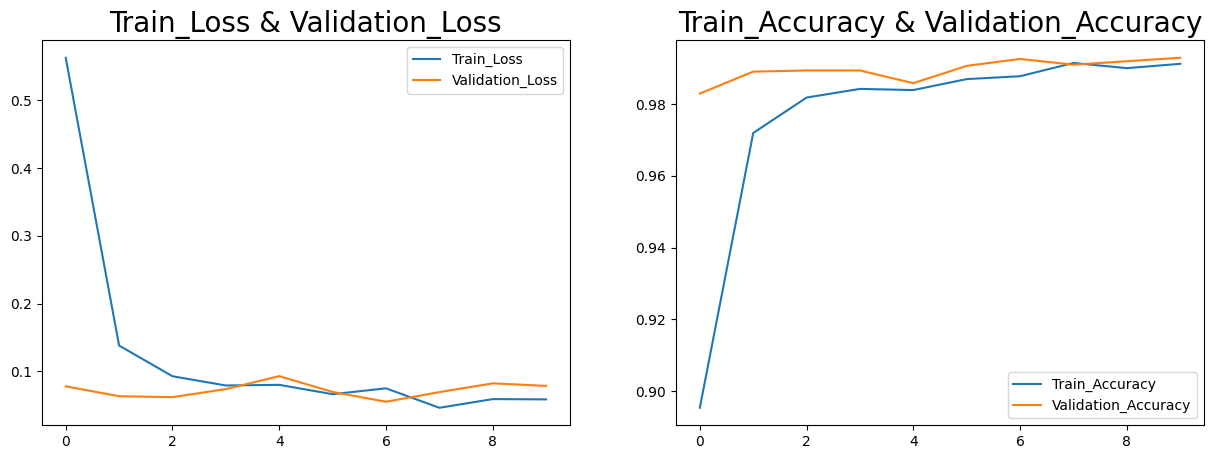

In [ ]:

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(hist_['loss'],label='Train_Loss')
plt.plot(hist_['val_loss'],label='Validation_Loss')
plt.title('Train_Loss & Validation_Loss',fontsize=20)
plt.legend()
plt.subplot(1,2,2)
plt.plot(hist_['accuracy'],label='Train_Accuracy')
plt.plot(hist_['val_accuracy'],label='Validation_Accuracy')
plt.title('Train_Accuracy & Validation_Accuracy',fontsize=20)
plt.legend()

In [ ]:
X_val,y_val,y_pred=[],[],[]
for images, labels in validation:
    y_val.extend(labels.numpy())
    X_val.extend(images.numpy())
predictions=keras_model.predict(np.array(X_val))
for i in predictions:
    y_pred.append(np.argmax(i))
df=pd.DataFrame()
df['Actual'],df['Prediction']=y_val,y_pred
df

98/98 [==============================] - 182s 2s/step


,Actual,Prediction
0,4,4
1,4,4
2,4,4
3,4,4
4,4,4
...,...,...
3104,8,8
3105,6,6
3106,4,4
3107,8,8


In [ ]:
plt.figure(figsize=(10,10))
for i in range(32):
    ax = plt.subplot(8, 4, i + 1)
    plt.imshow(X_val[i].astype("uint8"))
    plt.title(f'{class_names[y_val[i]]} :: {class_names[y_pred[i]]}')
    plt.axis("off")
